**Diffusion Model**

In [ ]:
!pip install diffusers transformers

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import Image,display

In [ ]:
#Load model or stable diffusion
#pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")

from diffusers import StableDiffusion3Pipeline
#model_id = "sd-legacy/stable-diffusion-v1-5"
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#prompt = "A cinematic image of a Lion wearing sunglasses in a desert at sunset"

prompt = "A HD image of a Man fashion model wearing black suit"
image = pipe(prompt , guidance_scale=2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image.save('generated_image.png')

array([[[167, 165, 161],
        [194, 190, 188],
        [203, 199, 201],
        ...,
        [ 16,  22,  23],
        [ 15,  17,  22],
        [ 13,  18,  14]],

       [[152, 148, 152],
        [180, 175, 178],
        [203, 200, 202],
        ...,
        [ 16,  21,  23],
        [ 13,  16,  19],
        [ 14,  14,  15]],

       [[131, 124, 132],
        [162, 156, 161],
        [190, 184, 188],
        ...,
        [ 13,  15,  18],
        [ 13,  14,  17],
        [ 10,  14,  16]],

       ...,

       [[156, 141, 137],
        [158, 140, 138],
        [156, 139, 139],
        ...,
        [ 29,  25,  26],
        [ 36,  34,  31],
        [ 27,  21,  23]],

       [[159, 146, 140],
        [155, 138, 135],
        [155, 137, 136],
        ...,
        [ 40,  34,  36],
        [ 35,  31,  34],
        [ 39,  35,  36]],

       [[159, 145, 143],
        [156, 141, 138],
        [156, 140, 137],
        ...,
        [ 42,  35,  38],
        [ 39,  31,  33],
        [ 47,  39,  36]]], dtype=uint8)
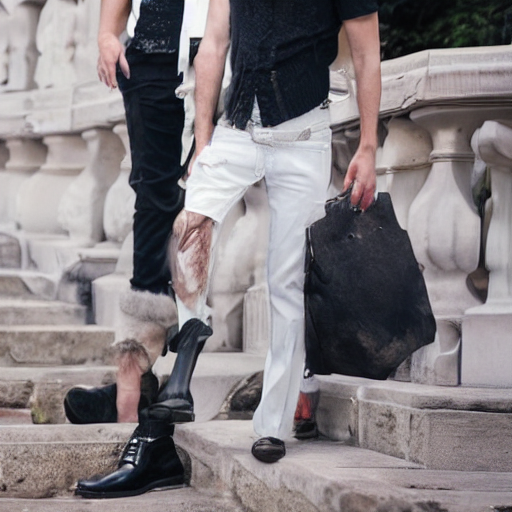

In [ ]:
import cv2
image_read = cv2.imread('/content/generated_image.png')
image_read = cv2.cvtColor(image_read , cv2.COLOR_BGR2RGB)
image_read

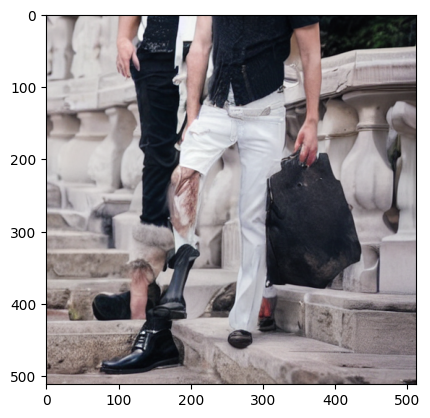

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
def generate_image(prompt):
  image = pipe(prompt , guidance_scale=2).images[0]
  return image

gr.Interface(fn=generate_image , inputs="text" , outputs="image" , title="Image Generator").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72c636dc496db6550f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token has not been saved to git credential helper.


In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")

image = pipe(
    "A capybara holding a sign that reads Hello World",
    num_inference_steps=28,
    guidance_scale=3.5,
).images[0]
image.save("capybara.png")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/6.31G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

text_encoder_3/model-00001-of-00002.safe(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder_3/model-00002-of-00002.safe(…):   0%|          | 0.00/4.53G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.99G [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import cv2
image_read = cv2.imread('/content/capybara.png')
image_read = cv2.cvtColor(image_read , cv2.COLOR_BGR2RGB)
image_read